In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/content/test - train.csv', parse_dates = True)

In [3]:
df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 0:00:00,0.0
1,1,0,2016-01-01 0:00:00,0.0
2,2,0,2016-01-01 0:00:00,0.0
3,3,0,2016-01-01 0:00:00,0.0
4,4,0,2016-01-01 0:00:00,0.0


In [4]:
# Checking for any missing values
df.isnull().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

In [5]:
# Descriptive analysis
df.describe()

,building_id,meter,meter_reading
count,498513.000000,498513.000000,4.985130e+05
mean,813.646820,0.657554,1.994749e+03
std,426.419227,0.933705,9.220850e+04
min,0.000000,0.000000,0.000000e+00
25%,414.000000,0.000000,1.210720e+01
50%,907.000000,0.000000,6.197520e+01
75%,1197.000000,1.000000,2.160000e+02
max,1448.000000,3.000000,8.243400e+06


In [6]:
unique_meter = df['meter'].unique()

In [7]:
# Seperating out the dataframe into multiple dataframe, each for a meter type
df_0 = df[df['meter'] == 0 ]
df_1 = df[df['meter'] == 1 ]
df_2 = df[df['meter'] == 2 ]
df_3 = df[df['meter'] == 3 ]

In [10]:
df_0

,meter_reading
timestamp,
2016-01-01 0:00:00,0.000
2016-01-01 0:00:00,0.000
2016-01-01 0:00:00,0.000
2016-01-01 0:00:00,0.000
2016-01-01 0:00:00,0.000
...,...
2016-01-10 0:00:00,6.100
2016-01-10 0:00:00,4.700
2016-01-10 0:00:00,0.000


In [11]:
df_0 = df_0[['timestamp','meter_reading']].set_index('timestamp')
df_0.index = pd.to_datetime('timestamp')

df_1 = df_1[['timestamp','meter_reading']].set_index('timestamp')
df_1.index = pd.to_datetime('timestamp')

df_2 = df_2[['timestamp','meter_reading']].set_index('timestamp')
df_2.index = pd.to_datetime('timestamp')

df_3 = df_3[['timestamp','meter_reading']].set_index('timestamp')
df_3.index = pd.to_datetime('timestamp')

KeyError: ignored

In [ ]:
pd.to_datetime(df_0.index)

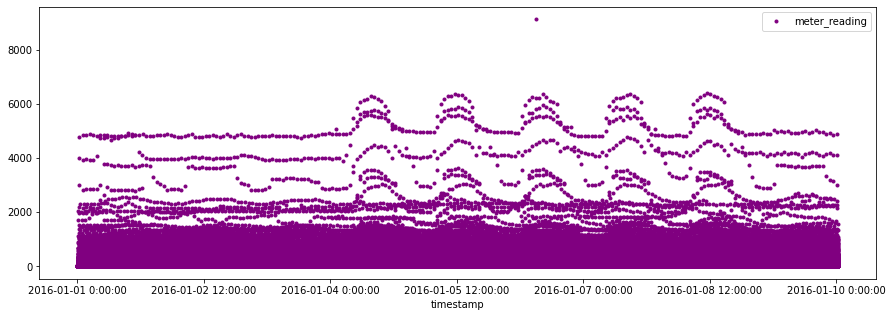

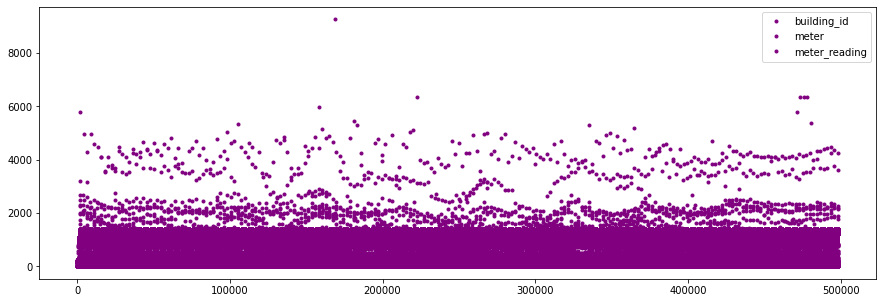

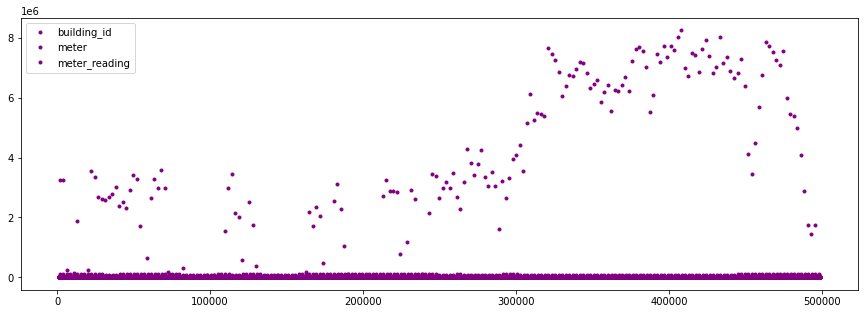

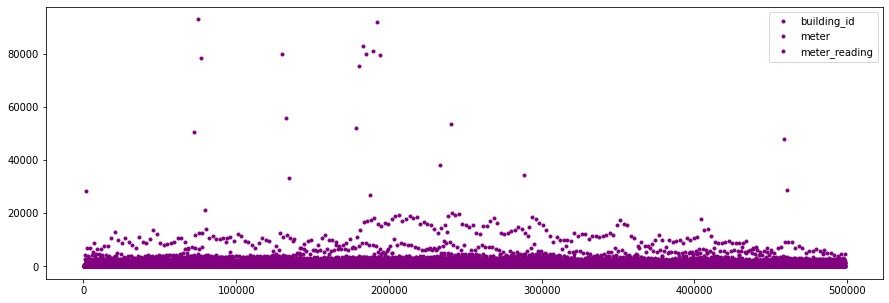

In [12]:
# Plotting different graphs each corresponding to a meter type

df_0.plot(style='.', figsize=(15,5), color='purple')
df_1.plot(style='.', figsize=(15,5), color='purple')
df_2.plot(style='.', figsize=(15,5), color='purple')
df_3.plot(style='.', figsize=(15,5), color='purple')

In [13]:
df.groupby(['building_id','meter']).sum('meter_reading')

,,meter_reading
building_id,meter,
0,0,0.0000
1,0,67.7099
2,0,4.0953
3,0,0.0000
4,0,0.0000
...,...,...
1444,0,1458.8750
1445,0,1242.2500
1446,0,343.9750


In [14]:
# Summing meter reading for each meter
meterwise = df.groupby('meter').sum('meter_reading')['meter_reading']

In [15]:
meterwise.describe()

count    4.000000e+00
mean     2.486021e+08
std      4.473875e+08
min      1.373024e+07
25%      1.726659e+07
50%      3.063365e+07
75%      2.619692e+08
max      9.194109e+08
Name: meter_reading, dtype: float64

In [16]:
# Summing meter reading for each building
buildingwise = df.groupby('building_id').sum('meter_reading')['meter_reading']

In [17]:
buildingwise.describe()

count    1.429000e+03
mean     6.958771e+05
std      1.990340e+07
min      0.000000e+00
25%      3.769890e+03
50%      1.802754e+04
75%      8.554380e+04
max      7.518695e+08
Name: meter_reading, dtype: float64

In [18]:
buildingwise.isnull().sum() #No missing values found

0

In [19]:
meterwise.isnull().sum() #No missing values found

0

In [20]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [21]:
# Hourly consumption of energy for each building and each meter

hourly_df = df.groupby(['building_id','meter',df['timestamp'].dt.hour]).sum('meter_reading')['meter_reading']

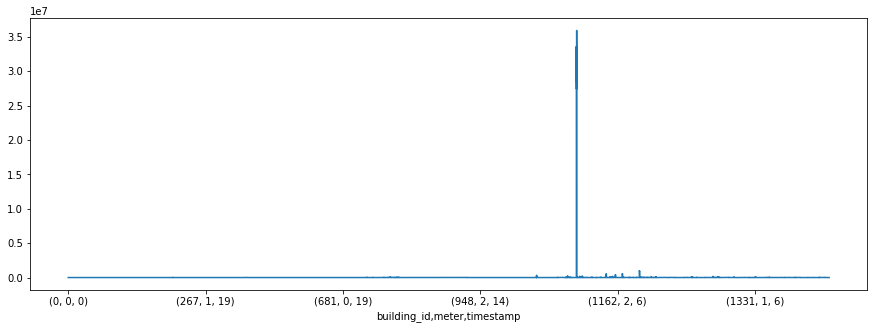

In [22]:
hourly_df.plot(figsize=(15,5))

In [23]:
df_with_zero_reading = df[df['meter_reading'] == 0]

In [24]:
df_with_zero_reading.groupby(['building_id','meter']).sum()

,,meter_reading
building_id,meter,
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
1412,1,0.0
1417,2,0.0
1420,2,0.0


In [ ]:
# Computing the skewwness of the dataframe
print(df.skew())

In [26]:
from sklearn.preprocessing import QuantileTransformer

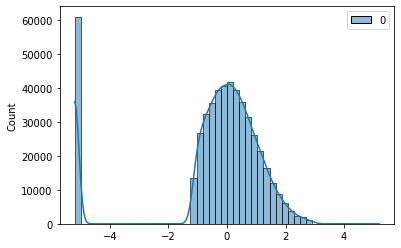

In [28]:
# Handling the skewness

qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
data = np.array(df['meter_reading']).reshape(-1,1)
x = qt.fit_transform(data)
sns.histplot(x, bins = 50, kde = True)